# Solución analítica de regresión lineal
Este cuaderno explora la solución analítica de una regresión lineal.

**Predicciones**

Esta ecuación expresa la forma en que asumimos que el valor de la variable $y$ se puede estimar a partir de las variables $x_{1}, x_{2}, x_{3}, . . ., x_{n} =  \mathbf{x}$
$$\hat{y}=w_{0}+\sum_{j=1}^{n}w_{j}\times x_{j}$$

Al definir $x_0 = 1$, podemos reescribir la expresion como $\hat{y} = \mathbf{x}^T\mathbf{w}$, lo cual es mucho más eficiente.

**Función objetivo**
$$
\mathbf{w}
 = \operatorname*{arg\,min}_\mathbf{w} \sum_{i=1}^{n} (y_i - \mathbf{x}_{i}^{T} \mathbf{w})^2 =  \operatorname*{arg\,min}_\mathbf{w} (Y-\mathbf{X}\mathbf{w})^{T}(Y-\mathbf{X}\mathbf{w})
$$

**Solución analítica**

$$\mathbf{w} = (\mathbf{X}^{T}\mathbf{X})^{-1}(\mathbf{X}^{T}Y)$$

Primero, es una buena práctica importar todos los paquetes necesarios al inicio del código.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Además, para que los resultados en este taller sean replicables para todos los estudiantes, vamos a configurar la semilla de los números aleatorios.

In [2]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## Ejercicio con datos simulados.

### Realidad perfecta (y falsa)

Los siguientes valores de $X$ y $y$ representan la realidad, sobre lo cual vamos a entrenar un modelo de machine learning:

In [3]:
X_real = np.linspace(0, 1, 1000000).reshape(-1,1)
y_real = 0.5*X_real + 0.7
X_real.shape

(1000000, 1)

In [4]:
def plot_Xy_pairs(X, y, styles, kwargs):
    """ Make a plot of X, y data.
  
    Args:
        X (list): list of numpy arrays of shape (n_samples, 1), which
            correspond to values for the horizontal axis.
        y (list): list of numpy arrays of shape (n_samples, 1), which
            correspond to values for the vertial axis.
        styles (list): styles of plots, 'scatter' or 'line'.
        kwargs (list): list of keyword arguments dicts passed to the plot
            function.

    Raises:
        ValueError if style is not scatter or line.
    """
    fig = plt.figure(figsize=[7, 5])
    ax = fig.add_subplot(111)
    ax.set_axisbelow(True)
    ax.grid(linestyle='--',color='0.7')
    ax.set_xlim(min(X[0]), max(X[0]))
    ax.set_xlabel("Predictor variable")
    ax.set_ylabel("Response variable")
    methods = []
    for s in styles:
        if s == 'line':
            methods.append(ax.plot)
        elif s == 'scatter':
            methods.append(ax.scatter)
        else:
            msg =  "Style option {} not defined"
            raise ValueError(msg.format(s))
    for X_, y_, m, kw in zip(X, y, methods, kwargs):
        m(X_, y_, **kw)
    ax.legend()

No handles with labels found to put in legend.
/home/camivasz/anaconda3/envs/avanzada/lib/python3.8/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


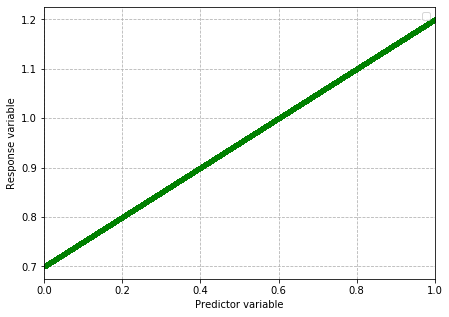

In [5]:
plot_Xy_pairs([X_real], [y_real], ['line'], [dict(color='g', alpha=0.65, marker='.')])

Como nunca se tiene acceso a la realidad completa, se deben tomar muestras de esta.

No handles with labels found to put in legend.


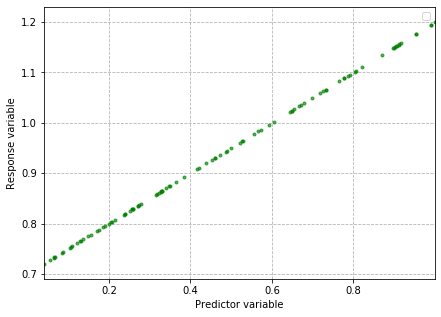

In [6]:
sample_size = 100
indices = np.random.randint(X_real.shape[0], size=sample_size)
X, y = X_real[indices], y_real[indices]

plot_Xy_pairs([X], [y], ['scatter'], [dict(color='g', alpha=0.65, marker='.')])

Ahora debemos partir los datos en muestra para entrenamiento y para pruebas:

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(100, 1) (67, 1) (33, 1)
(100, 1) (67, 1) (33, 1)


Ahora grafiquemos:

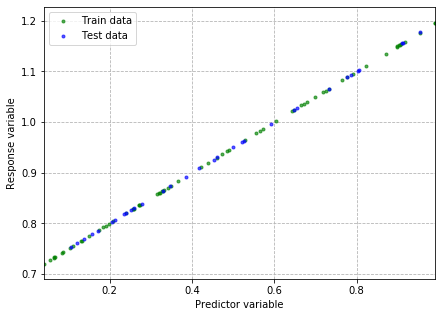

In [10]:
train_kwargs = dict(color='g', alpha=0.65, marker='.', label="Train data")
test_kwargs = dict(color='b', alpha=0.65, marker='.', label="Test data")
plot_Xy_pairs([X_train, X_test], [y_train, y_test], ['scatter']*2, [train_kwargs, test_kwargs])

In [19]:
(np.linalg.inv((np.transpose(X_train)*X_train))*np.transpose(X_train)*y_train).shape

(67, 67)

**Ejercicio 1:**
Ahora calculemos nuestro modelo usando la solución analítica $\mathbf{w} = (\mathbf{X}^{T}\mathbf{X})^{-1}(\mathbf{X}^{T}Y)$. (Recuerda añadir el término $x_0 = 1$). Se recomienda usar las siguientes funciones
*   [Transpuesta](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html)
*   [Inversa](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html)
*   [Concatenar](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

In [26]:
def train_linear_regression(X, y):
    """ Train a linear regression model using the analytical solution.
    
    Args:
        X (np.ndarray): Features in trainig data of shape (n_samples, n_features)
        y (np.ndarray): True values in training data of shape (n_samples, 1)
        
    Returns 
        weights (np.ndarray): weight values of shape (n_features, 1)
        
    """
    Xa = np.ones(X.shape)
    Xa = np.concatenate([Xa,X],axis = 1)
    Xinv = np.transpose(Xa)@Xa
    Xinv = np.linalg.inv(Xinv)
    weights = Xinv@np.transpose(Xa)@y
    return weights

In [27]:
weights = train_linear_regression(X_train, y_train)
weights

array([[0.7],
       [0.5]])

Dado que todo el ejercicio fue idealizado, los pesos deben dar exactamente $\mathbf{w} = \langle 0.7, 0.5 \rangle$. Ahora podemos hacer predicciones y estimar el error de estas predicciones tanto en el set de prueba como en el de entrenamiento.

**Ejercicio 2:** programa la función `make_predictions`. De nuevo, recuerda añadir $x_0 = 1$.

In [30]:
def make_predictions(weights, X):
    Xa = np.ones(X.shape)
    Xa = np.concatenate([Xa,X],axis = 1)
    predictions = Xa@weights
    return predictions

In [52]:
y_pred_train = make_predictions(weights, X_train)
print(y_pred_train.shape)

(67, 1)


Para poner a prueba nuestras predicciones necesitamos definir una métrica. En este caso vamos utilizar el RMSE definido como:
$$ RMSE = \sqrt{\frac{\sum_{i=1}^{n} (y-\hat{y})^2}{n}}$$

(RMSE es igual a la raiz cuadrada de la sumatoria de la diferencias al cuadrado entre los valores reales y las predicciones divido el número de datos)

**Ejercicio 3:** programar la función `compute_rmse`

In [38]:
def compute_rmse(y_true, y_pred):
    rmse = np.sqrt((1/y_pred.size)*np.sum(np.array((y_true-y_pred))**2))
    return rmse

In [39]:
train_error = compute_rmse(y_train, make_predictions(weights, X_train))
print("Training error: {}".format(train_error))
test_error = compute_rmse(y_test, make_predictions(weights, X_test))
print("Test error: {}".format(test_error))

Training error: 1.9181732326542192e-16
Test error: 2.0177460641536845e-16


De nuevo, lo ideal de este ejercicio implica que el error debe ser cero.

### Realidad con ruido (verdadera realidad)

Los siguientes valores de $X$ y $y$ representan la realidad, sobre lo cual vamos a entrenar un modelo de machine learning. Esta vez, vamos a simular ruido en nuestras observaciones

In [59]:
X_real = np.linspace(0, 1, 1000).reshape(-1,1)
y_real = 1.3*X_real + 2.1 + 0.5*np.random.randn(X_real.shape[0], 1)

No handles with labels found to put in legend.


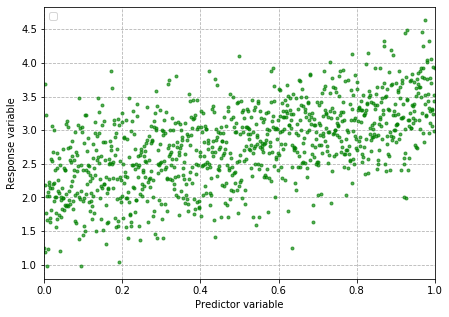

In [60]:
plot_Xy_pairs([X_real], [y_real], ['scatter'], [dict(color='g', alpha=0.65, marker='.')])

In [61]:
sample_size = 100
indices = np.random.randint(X_real.shape[0], size=sample_size)
X, y = X_real[indices], y_real[indices]

No handles with labels found to put in legend.


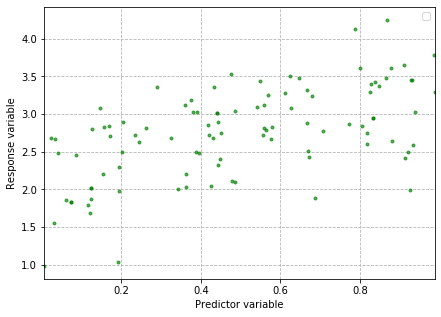

In [62]:
# --- YOUR CODE START HERE
plot_Xy_pairs([X], [y], ['scatter'], [dict(color='g', alpha=0.65, marker='.')])

# --- YOUR CODE ENDS HERE

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(100, 1) (67, 1) (33, 1)
(100, 1) (67, 1) (33, 1)


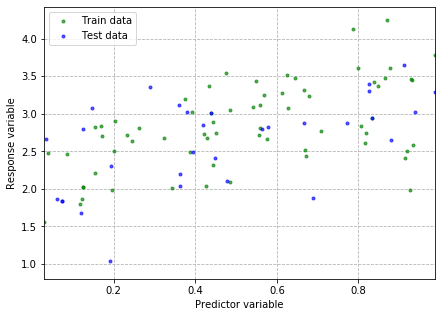

In [64]:
train_kwargs = dict(color='g', alpha=0.65, marker='.', label="Train data")
test_kwargs = dict(color='b', alpha=0.65, marker='.', label="Test data")
plot_Xy_pairs([X_train, X_test], [y_train, y_test], ['scatter']*2, [train_kwargs, test_kwargs])

In [65]:
weights = train_linear_regression(X_train, y_train)
weights

array([[2.2442514 ],
       [1.13855961]])

Esta vez es natural que los pesos den diferentes a los usados en la simulación, ya que se añadió ruido en los datos.

In [66]:
train_error = compute_rmse(y_train, make_predictions(weights, X_train))
print("Training error: {}".format(train_error))
test_error = compute_rmse(y_test, make_predictions(weights, X_test))
print("Test error: {}".format(test_error))

Training error: 0.46728693099848106
Test error: 0.5534305174205818


Dado que solo tenemos una variable predictora, podemos graficar el resultado de nuestro modelo.

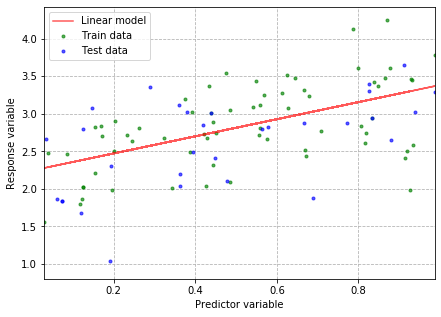

In [67]:
train_kwargs = dict(color='g', alpha=0.65, marker='.', label="Train data")
test_kwargs = dict(color='b', alpha=0.65, marker='.', label="Test data")
model_kwargs = dict(color='r', alpha=0.65, label="Linear model")
y_pred = make_predictions(weights, X_train)
plot_Xy_pairs([X_train, X_test, X_train], [y_train, y_test, y_pred], ['scatter', 'scatter', 'line'], [train_kwargs, test_kwargs, model_kwargs])

(array([ 3.,  1.,  6., 15., 14., 12., 23., 18.,  5.,  3.]),
 array([-1.41814472, -1.17464104, -0.93113736, -0.68763368, -0.44413   ,
        -0.20062632,  0.04287736,  0.28638104,  0.52988472,  0.7733884 ,
         1.01689208]),
 <a list of 10 Patch objects>)

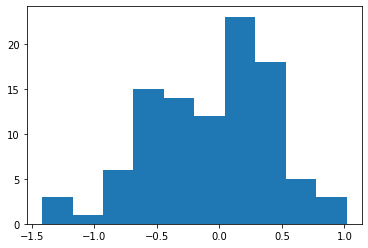

In [71]:
y_pred = make_predictions(weights, X)
residuales = y - y_pred
plt.hist(residuales, bins = 10)